# **수학 없이 배우는 데이터 과학과 알고리즘_모두를 위한 데이터 사이언스**

#### 2020710058 이두영
본 Review는 수학 없이 배우는 데이터과학과 알고리즘 책의 1장부터 5장까지 정리하였습니다.

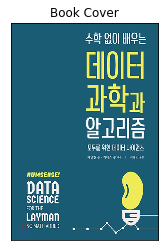

In [15]:
# This code is for load the book cover image.
import cv2
import matplotlib.pyplot as plt
Book_Cover = cv2.imread('NUMSENSE_DATA_SCIENCE.jpg', cv2.IMREAD_COLOR)
Book_Cover = cv2.cvtColor(Book_Cover, cv2.COLOR_BGR2RGB)
plt.imshow(Book_Cover)
plt.title('Book Cover')
plt.xticks([])
plt.yticks([])
plt.show()

### **<span style="color:blue">1장 기초 훑어보기</span>**<br>

 큰 틀에서 데이터 과학은 아래와 같은 순서로 분석한다.
 + 데이터 준비
 + 알고리즘 선택
 + 파라메터 튜닝
 + 정확도 평가
 
 각 단계별로 살펴보면 아래와 같다.
 + **데이터 준비**<br>
 1) 데이터 포멧<br>
 : table form, row → data point, column → variable(attribute, feature, dimension)<br>
 2) 변수 타입<br>
 : Binary(0 or 1), Categorical, Integer, Continuous<br>
 3) 특징 엔지니어링<br>
 : 여러 변수를 하나로 합침(차원 축소)<br>
 4) 누락 데이터 처리<br>
 : 근사값, 계산, 제거 등<br>
 + **알고리즘 선택**<br>
 1) 비지도 학습<br>
 : K-Means Clustering, PCA, Association Rules, SNA<br>
 2) 지도 학습<br>
 : Regression, K-NN, SVM, Decision Tree, Random Forest, Neural Networks<br>
 3) 강화 학습<br>
 : Multi-Armed Bandits
 + **파라메터 튜닝**<br>
 : 알고리즘마다 파라메터 튜닝이 다르다. 과적합 방지를 위해서 정규화 단계에서 패널티 파라메터를 사용한다.<br>
 + **결과 평가하기**<br>
 1) 분류지표<br>
 : 혼동행렬(Confusion Matrix)<br>
 2) 회귀지표<br>
 : 평균 제곱근 오차(Root Mean Squared Error)<br>
 3) 검증<br>
 : Cross-Validation

### **<span style="color:blue">2장 K-평균 군집화</span>**<br>
**2.1 고객 군집 찾기**<br>
 예를 들어서 A영화를 좋아하는 사람이 A영화와 비슷한 성향인 B라는 영화를 좋아할 가능성이 크다. 이렇게 공통적인 취향이나 성질을 규명함으로써 고객을 그룹화할 수 있다. K-평균 군집화를 통해서 고객이나 상품을 군집으로 묶을 수 있다.(여기서 K는 찾아낸 그룹의 개수)<br>
 
**2.2 예제: 영화 팬들의 성향 프로필**<br>
 K-평균 군집화를 이용해서 고객 군집을 찾으려면 정량화할 수 있는 정보가 필요하다. 수입을 기준으로 보면 고소득자가 저소득자에 비해서 유명 브랜드 선호한다라고 생각할 수 있다. 성격 특성을 기준으로 보면 외향성, 근면성, 감성, 개방성의 네가지 분류가 있다. 이러한 성격 특성 사이에는 양의 상관관계가 있는데 매우 근면한 사람들은 외향적인 경우가 많고, 매우 감성적인 사람은 개방성이 높은 경향이 있다. 이를 시각화 하기 위해서 각각을 묶을 수 있다. 이런 경우 K는 2가되며, 2개의 군집이 생긴다. 따라서, 동일 군집내에 있는 다른 상품을 추천해주는데 사용할 수 있다.<br>
 
**2.3 군집 정의하기**<br>
 군집을 정의하기 위해서는 아래의 두 가지 질문에 답해야 한다.<br>
+ 얼마나 많은 군집이 존재하는가?
+ 각 군집의 포함 관계를 어떤가?<br>

얼마나 많은 군집이 존재하는가?에 대한 답은 주관적이다. 군집을 크게 구성할 수도 있고 잘게 쪼개어 여러 개의 군집으로 구성할 수도 있다. 최적의 군집 개수를 알기 위해서는 킨크를 확인해야한다. 킨크는 군집의 개수(x축)에 따른 군집 내 산포(y축)을 나타낸 그래프에서 급격하게 꺽여지는 점을 말한다.<br>

군집의 포함 관계를 확인하기 위해서는 아래와같은 단계를 거치면 된다.
1. 0단계: 각 군집의 중심점을 추정한다. 이때 추정된 중심점을 의사 중심점이라고 한다.
2. 1단계: 각 데이터 포인트를 가장 가까운 의사 중심점으로 배정한다. 이렇게 하면 붉은색과 푸른색의 두 군집이 형성된다.
3. 2단계: 의사 중심점을 각 군집 내 멤버의 중심점으로 이동시킨다.
4. 3단계: 군집 포함 관계에 변화가 없을 때까지 멤버 재할당과 클러스터 중심점 위치 조정을 반복한다.

**2.4 제약**<br>
각 데이터의 포인트가 오직 한 군집에만 속해야 한다.<br>

**2.5 요약**<br>
+ k-평균 군집화는 근사한 데이터 포인트를 그룹화하는 기법이다. 군집의 개수 k는 사전에 정의해야 한다.
+ 데이터 포인트를 군집화하기 위해 우선 각 포인트를 가장 가까운 군집에 배정한 후 , 군집의 중심점을 갱신한다. 군집의 포함 관계에 변화가 없을 때까지 두 단계를 반복한다.
+ K-평균 군집화는 구 형태의 겹치지 않는 군집에 적합하다.

### **<span style="color:blue">3장 주성분 분석</span>**<br>
**3.1 식품의 영양 성분 파악**<br>
식품을 구별하는데 가장 좋은 방법은 영양성분의 함량으로 확인하는 것이다.<br>

**3.2 주성분**<br>
주성분 분석(Principal Component Analysis, PCA)이란, 데이터 포인트를 가장 잘 구별해주는 숨겨진 변수(주성분)을 찾는 기법이다. 주성분은 데이터 포인트가 가장 넓게 분포하는 차원을 말한다.<br>
식품과 육류를 구별하는데는 비타민C, 지방 변수를 사용할 수 있다. 하나를 사용할 때보다 두 변수를 사용할 때 더 분포도 있도록 식품을 구별할 수 있다.(채소나 육류 내에서도 구별하기 더 쉽다.) 두 개 이상의 변수를 사용할 때는 표준화(Standardization)하여 단위를 통일시켜야 한다. <br>

**3.3 식품 그룹 분석**<br>
식품을 분석하기 위해서는 지방, 단백질, 섬유소, 비타민C의 4가지 변수를 활용할 수 있다. 채소와 육류를 구별하는 것은 물론이고, 채소내에서 섬유소 함량이 많고 적음에 따라 분류가 가능하다. 마찬가지로 육류의 경우에는 지방의 유무로 한번 더 분류가 가능하다. 각 변수별로 상관도를 분석하여 상관도가 높은 변수를 통합해서 2개 차원만 사용할 수 있다. 이렇게하면 차원 축소가 된다. 일반적으로 첫 번째 주성분이 절대적이며, 나머지 주성분은 킨트를 활용해서 어디까지의 주성분을 활용할지 정하면된다.<br>

**3.4 제약**<br>
PCA는 데이터 포인트의 분포가 가장 넓은 차원이 가장 유용하다는 것을 전제로 한다. 하지만 그렇지 않은 경우가 있다. 예를들어 층이 쌓여있는 펜케익이다. 펜케익의 높이가 중요한 요소이지만 충분이 높지 않다면, 펜케익의 넓이가 첫 번째 주성분이될 수 있다. 독립 성분 분석(ICA)기법도 활용되기는 하나 주성분 분석이 여전히 중요한 차원축소 방법으로 사용되고 있다.<br>

**3.5 요약**<br>
+ 주성분 분석(PCA)를 이용하면 주성분이라고 부르는 적은 수의 변수로 데이터 세트를 표현할 수 있으므로 PCA를 차원 축소 기법이라 한다.
+ 각 주성분은 이미 존재하는 변수들의 가중값 합이다. 상위 주성분을 이용하면 분석과 시각화를 개선할 수 있다.
+ 가장 많은 정보를 포함한 차원을 따라 데이터가 넓게 분포하고, 각 차원이 서로 직교인 경우, PCA가 유용하다.

### **<span style="color:blue">4장 연관 규칙</span>**<br>
**4.1 구매 패턴 발견하기**<br>
식료품점에서 두 품목 X와 Y가 자주 함께 구매된다고 가정해보자. 아래와 같이 품목들이 서로 어덯게 연관되는지를 알고자 할 때 연관 규칙을 사용할 수 있다.<br>
+ Y를 구매하는 사람을 X의 광고 대상으로 타깃팅할 수 있다.
+ 한 품목을 사는 사람이 다른 품목도 구매하도록 유도하기 위해 X와 Y를 같은 진열장에 전시한다.
+ X와 Y를 통합해 새로운 상품을 만든다. 예를 들어, X에 Y의 취향을 첨가한다.<br>

**4.2 지지도와 신뢰도, 향상도**<br>
연관 관계를 찾는 데 세 가지 지표가 있다.<br>
1. 지지도(Support)
 - 지지도는 특성 품목 집합이 거래에서 얼마나 자주 등장하는지를 나타내는 것으로, 해당 품목 집합을 포함하는 거래의 비율로 계산할 수 있다.
2. 신뢰도(Confidence)
 - 신뢰도는 품목X가 존재할 때 Y가 나타나는 빈도를 말하는 것으로 {X → Y}로 표기한다. 즉, X가 포함된 거래 중에 Y도 포함하는 거래의 비율로 측정할 수 있다.
3. 향상도(Lift)
 - 향상도는 두 품목 각각이 얼마나 자주 팔리느냐를 고려햇을 때, 항목X 와 Y가 함께 팔리는 빈도를 나타낸다.
 
**4.3 예제: 식료품 거래 분석**<br>
식료품점에서 한 달간 수집한 데이터를 이용해 연관성 지표를 활용하는 예를 살펴보면 아래와 같은 연관 관계를 알 수 있다.
+ 가장 빈번한 거래는 씨앗 과일과 열대 과일이다.
+ 또 다른 빈번한 거래로는 양파와 채소가 있다.
+ 슬라이스 치즈를 구매하면 소시지를 구매할 가능성이 크다.
+ 차를 구매하면 열대 과일을 구매할 가능성이 크다.

신뢰도의 단점은 연관관계의 중요도를 왜곡할 수 있다는 것이다. 단순히 많이 팔리는 두 항목은 실제로 연관 관계가 없음에도 신뢰도가 높게 측정될 수 있다.

**4.4 Aprior 원칙**<br>
가능한 품목 집합의 가짓수를 줄이는 방법 중 하나로 apriori 원칙을 활용할 수 있다. apriori 원칙은 어떤 품목 집합의 빈도가 늦으면, 해당 품목 집합을 포함하는 더 큰 품목 집합의 빈도도 낮다는 것이다. 예를 들면, {맥주}의 빈도가 낮으면 {맥주, 피자}의 빈도도 낮아야한다는 말이다. <br>
+ 지지도가 높은 품목 집합 찾기
 - 0단계: {사과}와 {배}처럼 품목 하나를 포함하는 품목 집합에서 시작한다.
 - 1단계: 각 품목 집합의 지지도를 구한다. 지지도 임계값을 넘는 품목 집합만 남기고 나머지는 버린다.
 - 2단계: 앞 단계에서 남겨진 품목 집합에 새로운 품목 하나를 추가해 만들 수 있는 모든 후보 품목 집합을 생성한다.
 - 3단계: 새로운 품목 집합이 더 이상 없을 때까지 1, 2단계를 반복하며 더 큰 품목 집합의 지지도를 구해 나간다.

Aprior 원칙을 이용하면 상당수의 후보 품목 집합을 걸러낼 수 있다. 예를 들면, {사과}의 지지도가 낮다면 사과를 포함한 모든 후보 품목 집합이 제거되므로 고려해야 할 가짓수가 절반 이하로 줄어든다.<br>

+ 신뢰도나 향상도가 높은 품목 규칙 찾기
 - 지지도가 높은 품목 집합을 찾는 일뿐만 아니라 신뢰도나 향상도가 높은 품목 집합을 찾을 때도 apriori 원칙을 사용할 수 있다. 지지도를 이용하면 신뢰도와 향상도를 계산할 수 있으므로 지지도가 높은 품목 집합을 먼저 찾고 나면 원하는 연관성을 찾는 일은 상대적으로 계산량이 적다.
 
**4.5 제약**<br>
1. 계산량이 많다. Apriori를 이용해 후보 품목 집합의 수를 줄인다고 해도 상점에 품목의 수가 많거나 지지도 임계값이 낮으면 가짓수는 매우 클 수가 있다.
2. 연관성에 대한 고찰이 필요하다. 품목 수가 많으면 연관 관계가 우연에 의해서 생길 수도 있다.

**4.6 요약**<br>
+ 연관 규칙은 어떤 품목이 단독적으로, 혹은 다른 품목과 관계돼 얼마나 자주 등장하는지를 밝혀낸다.
+ 연관성을 측정하는 일반적인 지표에는 세 가지가 있다.
 1. {X}의 지지도는 품목 X의 등장 빈도를 나타낸다.
 2. {X → Y}의 신뢰도는 품목 X가 등장할 때 품목 Y가 함께 등장할 빈도를 나타낸다.
 3. {X → Y}의 향상도는 각각의 빈도를 고려했을 때, 품목 X와 Y가 함께 등장하는 빈도를 나타낸다.
+ Apriori 원칙을 이용하면 빈도가 낮은 상당수의 품목 집합을 제거함으로써 빈도가 높은 품목 집합을 빠르게 찾을 수 있다.

### **<span style="color:blue">5장 소셜 네트워크 분석</span>**<br>
**5.1 관계 매핑하기**<br>
그룹 안에서 영향력 잇는 사람과 그 사람들이 그룹을 어떻게 이끄는지를 알고 싶을 때 소셜 네트워크 분석(Social Network Analysis, SNA)이라는 기법을 사용할 수 있다.SNA는 입소문 마케팅과 질병 역학 모델링, 팀게임 전략 등에서 유용하지만, 이름에서 알 수 있듯이 소셜 네트워크에서의 관계를 파악하는 데 주로 이용된다.

SNA는 네트워크 형식의 그림으로 표현이 가능한데 사람들 사이의 관계를 보여 줄 때를 예로들면, 각각의 사람은 노드로 표현하고 노드 간의 선의 간선이라고하며 이 간선의 굵기에 따라서 관계의 강도를 나타내 준다. 책의 그림을 참조하면 아래와 같은 정보를 알 수 있다.(그림으로만 아래의 정보를 알 수 있다는 것으로 참조해도 괜찮다.)
+ 데이비드는 연결이 가장 많은 사람이므로, 나머지 세 명과 친하다.
+ 톰은 데이비드 외의 사람은 모르지만, 둘은 좋은 친구다.
+ 줄리아는 마리와 데이비드를 알지만, 가까운 사이는 아니다.

**5.2 예제: 무기 거래로 엿보는 지정학**<br>
스톡홀름 국제평화연구재단에서는 나라 간의 주요 무기 거래에 대한 데이터를 얻을 수 있다. 책에서는 이미지로 각 나라간의 무기 거래 네트워크를 보여주고있다. 해당 네트워크를 루뱅 매서드로 분석하면, 지정학적 동맹 관계가 3개의 군집으로 나눠진다는 것을 알 수 있다.
+ 푸른색(첫 번째 군집): 미국과 그 동맹국 영국과 이스라엘을 위주로 하는 가장 큰 군집
+ 노란색(두 번째 군집): 독일이 주도하며 주로 유럽 국가로 구성된 군집이며 푸른색 군집과 밀접한 관계를 공유함
+ 빨간색(세 번째 군집): 러시아와 중국이 주도하는 군집으로, 나머지 두 군집과 단절됨. 주로 아시아와 아프리카 국가로 구성됨

해당 군집들을 자세히보면, 오랫동안 지속되는 동맹과 민주주의와 공산주의 국가 간의 양극 체제, 점점 커지는 미국과 중국 사이의 권력 다툼을 포함하는 21세기 지정학적 현실이 반영되어 있음을 알 수 있다. 

군집으로 그룹화하는 작업과 더불어 페이지랭크를 이용해서 각 나라의 영향도를 순위별로 나열하여 그림으로 표현할 수도 있다. 분석 결과를 보면 영향력이 큰 상위 5개 나라가 미국과 러시아, 독일, 프랑스, 중국임을 알 수 있는데, 이 중 4개 나라가 국제 안전보장 이사회의 멤버로써 영향력이 미치고 있다. 

**5.3 루뱅 메서드**<br>
네트워크 안의 군집을 반결하는 방법 중 하나가 루뱅 매서드다. 루뱅 매서드는<br>
1) 같은 군집 내부의 간선의 개수와 강도를 최대화하는 반면,<br>
2) 서로 다른 군집 사이에서는 간선의 개수와 강도가 최소화되도록 군집을 조정한다.<br>
위 두 조건이 얼마나 잘 달성됐느냐를 가리키는 척도를 모듈성(Modularity)이라고 하며, 모듈성이 높을수록 군집화가 최적으로 수행됐음을 의미한다.<br>
최적의 군집을 얻기 위해 루뱅 메서드는 다음과 같은 과정을 반복한다.
+ 0단계: 각 노드 하나하나를 하나의 군집으로 가정한다. 즉, 노드 개수만큼의 군집이 존재하는 상태에서 시작한다.
+ 1단계: 각 노드를 모듈성이 최대화되는 군집에 재할당한다. 모듈성을 더 이상 높일 수 없다면 해당 노드는 그대로 둔다. 더 이상의 재할당이 없을 때까지 모든 노드에 이 과정을 반복한다.
+ 2단계: 1단계에서 찾은 각 군집을 하나의 노드로 치환해 새로운 Coarse-grained 네트워크를 만든다. 그리고 원래 군집 사이에 존재하던 간선들을 통합해 새로운 노드 사이의 가중값 간선으로 만든다.
+ 3단계: 더 이상의 재할당과 통합이 없을 때까지 1단계와 2단계를 반복한다.

이와 같이 루뱅 메서드는 작은 군집을 먼저 찾은 후, 군지븡ㄹ 적절히 통합합으로써 더 큰 군집을 찾을 수 있도록 해준다. 

**5.4 페이지랭크 알고리즘**<br>
지배적인 노드를 찾기위해서는 노드에 순위를 부여하여야 한다. 페이지랭크 알고리즘은 구굴이 웹 사이트에 순위를 부여할 때 맨처음 사용한 알고리즘이다. 웹 사이트의 페이지랭크는 세 가지 요소로 결저오딘다.
1. 링크의 수: 한 웹사이트가 다른 웹 사이트로부터 링크돼 있으면, 더 많은 사용자를 끌어들일 수 있다.
2. 링크의 강도: 사용자가 링크에 더 많이 접근할수록 웹 사이트의 트래픽도 높다.
3. 링크의 출처: 랭크가 높은 웹 사이트로부터 링크된 웹 사이트는 랭크가 높아진다.

특정 노드(웹 사이트) 하이퍼링크(간선)의 가중값이 클수록 해당 웹사이트로 많은 트래픽이 유입된다는 것을 의미한다. 페이지랭크 알고리즘에도 제약이 있다. 오래된 노드에게 유리한 방향으로 편향될 수 있다. 예를 들어, 새로운 웹페이지에 우수한 콘텐츠가 존재해도 초기에 발견하기 어렵기 때문에 페이지랭크가 낮아질 수 있다. 

**5.5 제약**<br>
군집화와 랭킹이 네트워크에 대한 깊은 통찰을 제공해주지만, 결과를 해석할 때는 신중해야 한다. 이유는 무기 거래가 없는 국가 간의 외교 관계를 과소평가하면 안되기 때문이다. 선택한 데이터 출처의 합리성과 분석 기법의 견고성이 충분함을 확인하려면 다른 출처에서 얻은 정보를 분석한 결과도 확인해봐야 한다.

**5.6 요약**<br>
+ 소셜 네트워크 분석은 개체 사이의 관계를 매핑하고 분석하는 기법이다.
+ 로뱅 매서느는 군집 내의 상호작용을 최대화하고 군집 사이의 상호작용을 ㅚ소화함으로써 네트워크에 존재하는 군집을 찾아낸다. 군집의 크기가 비슷하고 군집이 겹치거나 중복되지 않는 경우에 적합하다.
+ 페이지랭크 알고리즘은 링크의 개수와 강도, 링크의 출처를 바탕으로 네트워크에 존재하는 노드에 순위를 부여한다. 페이지랭크를 이용하면 네트워크에서 유력한 노드를 찾아낼 수 있지만, 많은 링크를 만들 시간이 부족한 새로운 노드에 불이익을 줄 수 있다.